# Importando Bibliotecas 

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
%matplotlib inline

# Lendo Arquivo CSV

In [4]:
df = pd.read_csv('../Dados/dados.csv')

In [5]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


Pesquisa Nacional por Amostra de Domicílios - 2015
A Pesquisa Nacional por Amostra de Domicílios - PNAD investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

In [6]:
UF = {'11': 'Rondônia',
     '12': 'Acre',
     '13': 'Amazonas',
     '14': 'Roraima',
     '15': 'Pará',
     '16': 'Amapá',
     '17': 'Tocantins',
     '21': 'Maranhão',
     '22': 'Piauí',
     '23': 'Ceará',
     '24': 'Rio Grande do Norte',
     '25': 'Paraíba',
     '26': 'Pernambuco',
     '27': 'Alagoas',
     '28': 'Sergipe',
     '29': 'Bahia',
     '31': 'Minas Gerais',
     '32': 'Espírito Santo',
     '33': 'Rio de Janeiro',
     '35': 'São Paulo',
     '41': 'Parana',
     '42': 'Santa Cartarina',
     '43': 'Rio Grande do Sul',
     '50': 'Mato Grosso do Sul',
     '51': 'Mato Grosso',
     '52': 'Goiás',
     '53': 'Distrito Federal'}

In [7]:
Sexo = {'0': 'Masculino',
       '1': 'Feminino'}

In [8]:
Cor = {'0':'Indigena',
      '2':'Branca',
      '4':'Preta',
      '6':'Amarela',
      '8':'Parda',
      '9':'Sem declaração'}

In [9]:
df['UF'] = df['UF'].apply(str)
df['Sexo'] = df['Sexo'].apply(str)
df['Cor'] = df['Cor'].apply(str)

In [10]:
df['UF'].dtypes

dtype('O')

In [11]:
df['UF'] = df['UF'].map(UF)
df['Sexo'] = df['Sexo'].map(Sexo)
df['Cor'] = df['Cor'].map(Cor)

In [12]:
df.isna().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

In [13]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,12,800,1.603808
1,Rondônia,Feminino,23,Branca,12,1150,1.739790
2,Rondônia,Feminino,35,Parda,15,880,1.760444
3,Rondônia,Masculino,46,Branca,6,3500,1.783158
4,Rondônia,Feminino,47,Parda,9,150,1.690631


In [14]:

filtro_renda = df[df['Renda']<=10000]
filtro_renda_bp = df[df['Renda']<=5000]

# Funções 

In [15]:
def porcentagem_populacao(dataframe,q1,q3):
    filtro = [dataframe['Renda']>= q1] and [dataframe['Renda'] <= q3]
    filtro_df = dataframe[filtro[0]]
    return filtro_df.shape[0]/dataframe.shape[0]

# Cálculos estatístico da Renda de toda população brasileira

###  Fazer uma função que que recebe uma banco de dados e um intervalo de renda e retorna a porcentagem da população

In [16]:
renda_media_total = df['Renda'].mean()
renda_media_total

2000.3831988547631

In [17]:
renda_mediana_total = df['Renda'].median()
renda_mediana_total

1200.0

In [18]:
q1, _, q3 = df['Renda'].quantile([0.25, 0.5, 0.75])
q1

788.0

In [19]:
renda_maxima = df['Renda'].max()
renda_maxima


200000

In [20]:
renda_minima = df['Renda'].min()
renda_minima

0

In [21]:
print('{:.2f} % da população brasileira vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df,q1,q3) *100, q1,q3))

76.10 % da população brasileira vive com um salario entre R$788.00 e R$2000.00


## Histogramas 

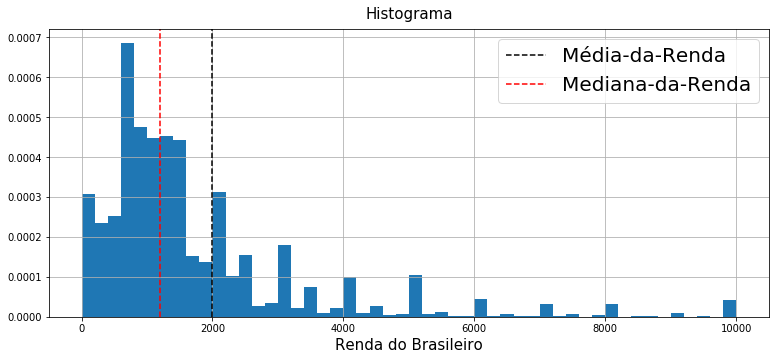

In [22]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_renda['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda do Brasileiro', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_total, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_total, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)


#fig.savefig('../Dados/imagens/histograma_renda.png', bbox_inches='tight')

# Teste de Normalidade

In [23]:
stat_test, p_valor = normaltest(df.Renda)
print(stat_test)
print(p_valor)

152380.75803960307
0.0


### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [24]:
p_valor <= 0.05

True

### Logo essa distribuição não é normal

# Teste de Mann-Whitney

Comparação de duas amostras independentes

In [30]:
mulheres = df.query('Sexo == "Feminino" and Renda > 0').sample(n = 10, random_state = 101).Renda
homens = df.query('Sexo == "Masculino" and Renda > 0').sample(n = 10, random_state = 101).Renda
significancia = 0.05

### $\mu_m \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino
### $\mu_h \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino

### $
\begin{cases}
H_0: \mu_m = \mu_h\\
H_1: \mu_m < \mu_h
\end{cases}
$

Deve-se optar pela distribuição **$t$ de Student**, já que nada é mencionado sobre a distribuição da população, o desvio padrão populacional é desconhecido e o número de elementos investigados é menor que 30.

In [29]:
u, p_valor = mannwhitneyu(mulheres, homens, alternative='less')
print(u)
print(p_valor)

25.0
0.03161141467553912


In [31]:
p_valor <= significancia

True

### <font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo feminino é menor que a média das rendas dos chefes de domicílios do sexo masculino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

## BoxPlot

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_renda_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda Brasileria'])
eixo.grid(True)

#fig.savefig('../Dados/imagens/boxpot_renda.png', bbox_inches='tight')

# Cálculo estatisco da população parda brasileira 

In [ ]:
pardos = df['Cor'] == 'Parda'

In [ ]:
df_pardos = df[pardos]
df_pardos.head()

In [ ]:
filtro_pardos = df_pardos[df_pardos['Renda'] <= 10000]
filtro_pardos_bp = df_pardos[df_pardos['Renda'] <= 5000]

In [ ]:
renda_media_pardos = df_pardos['Renda'].mean()
renda_media_pardos

In [ ]:
renda_mediana_pardos = df_pardos['Renda'].median()
renda_mediana_pardos

In [ ]:
q1,_,q3 = df_pardos['Renda'].quantile([0.25, 0.5, 0.75])

In [ ]:
print('{:.2f} % da parda vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df_pardos,q1,q3) *100, q1,q3))

In [ ]:
maximo_pardos = df_pardos['Renda'].max()
maximo_pardos

In [ ]:
minimo_pardos = df_pardos['Renda'].min()
minimo_pardos

## Exportando csv

In [ ]:
df_pardos_tratado = df_pardos.drop(['Cor','Altura'], axis=1)
df_pardos_tratado.to_csv('../Dados/dados_pardos.csv',index=False)


   # Histograma 

In [ ]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_pardos['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda da população parda brasileira', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_pardos, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_pardos, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)

#fig.savefig('../Dados/imagens/histograma_renda_pardos.png', bbox_inches='tight')

 ## BoxPlot

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_pardos_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda população parda brasileira'])
eixo.grid(True)

#fig.savefig('../Dados/imagens/boxplot_renda_pardos.png', bbox_inches='tight')

# Cálculo estatístico da população branca brasileira

In [ ]:
df_brancos = df[df['Cor'] == 'Branca']
df_brancos.head()

In [ ]:
filtro_branco = df_brancos[df_brancos['Renda'] <=10000]
filtro_branco_bp = df_brancos[df_brancos['Renda'] <=5000]

In [ ]:
renda_media_branca = df_brancos['Renda'].mean()
renda_media_branca

In [ ]:
renda_mediana_branca = df_brancos['Renda'].median()
renda_mediana_branca

In [ ]:
q1,_,q3 = df_brancos['Renda'].quantile([0.25,0.5,0.75])

In [ ]:
print('{:.2f} % da população branca vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df_brancos,q1,q3) *100, q1,q3))

In [ ]:
maximo_branco = df_brancos['Renda'].max()
maximo_branco

In [ ]:
minimo_branco = df_brancos['Renda'].min()
minimo_branco

## Exportando csv

In [ ]:
df_brancos_tratado = df_brancos.drop(['Cor','Altura'], axis=1)
df_brancos_tratado.to_csv('../Dados/dados_brancos.csv',index=False)

## Histograma

In [ ]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_branco['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda da população branca brasileira', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_branca, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_branca, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)

#fig.savefig('../Dados/imagens/histograma_renda_brancos.png', bbox_inches='tight')

## BoxPlot 

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_branco_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda população branca brasileira'])
eixo.grid(True)

#fig.savefig('../Dados/imagens/boxplot_renda_brancos.png', bbox_inches='tight')

### OBS: Esses dados são auto declarados. Eu acredito que ocorra uma sobreposição entre as declarações.   

# Cálculo estatístico da população indigena brasileira

In [ ]:
df_indigena = df[df['Cor'] == 'Indigena']
df_indigena.head()

In [ ]:
filtro_indigena = df_indigena[df_indigena['Renda'] <= 10000]
filtro_indigena_bp = df_indigena[df_indigena['Renda'] <= 5000]

In [ ]:
renda_media_indigena = df_indigena['Renda'].mean()
renda_media_indigena

In [ ]:
renda_mediana_indigena = df_indigena['Renda'].median()
renda_mediana_indigena

In [ ]:
q1,_,q3=df_indigena['Renda'].quantile([0.25,0.5,0.75])

In [ ]:
print('{:.2f} % da população indigena vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df_indigena,q1,q3) *100, q1,q3))

In [ ]:
maximo_indigena = df_indigena['Renda'].max()
maximo_indigena

In [ ]:
minimo_indigena = df_indigena['Renda'].min()
minimo_indigena

## Exportando csv

In [ ]:
df_indigena_tratado = df_indigena.drop(['Cor','Altura'], axis=1)
df_indigena_tratado.to_csv('../Dados/dados_indigena.csv',index=False)

## Histograma

In [ ]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_indigena['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda do indigena brasileiro', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_indigena, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_indigena, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)

#fig.savefig('../Dados/imagens/histograma_renda_indigena.png', bbox_inches='tight')

## BoxPlot 

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_indigena_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda população indigena brasileira'])
eixo.grid(True)

#fig.savefig('../Dados/imagens/boxplot_renda_indinega.png', bbox_inches='tight')

# Cálculo estatístico da população preta brasileira 

In [ ]:
df_preta = df[df['Cor'] == 'Preta']
df_preta.head()

In [ ]:
filtro_preta = df_preta[df_preta['Renda'] <= 10000]
filtro_preta_bp = df_preta[df_preta['Renda'] <= 5000]

In [ ]:
renda_media_preta = df_preta['Renda'].mean()
renda_media_preta

In [ ]:
renda_mediana_preta = df_preta['Renda'].median()
renda_mediana_preta

In [ ]:
q1,_,q3 = df_preta['Renda'].quantile([0.25,0.5,0.75])

In [ ]:
print('{:.2f} % da população preta vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df_preta,q1,q3) *100, q1,q3))

In [ ]:
maximo_preta = df_preta['Renda'].max()
maximo_preta

In [ ]:
minimo_preta = df_preta['Renda'].min()
minimo_preta

## Exportando Dados 

In [ ]:
df_preta_tratado = df_preta.drop(['Cor','Altura'], axis=1)
df_preta_tratado.to_csv('../Dados/dados_preta.csv',index=False)

 ## Histograma

In [ ]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_preta['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda do da população preta brasileira', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_preta, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_preta, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)

#fig.savefig('../Dados/imagens/histograma_renda_preta.png', bbox_inches='tight')

## Boxplot 

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_preta_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda população preta brasileira'])
eixo.grid(True)

#fig.savefig('../Dados/imagens/boxplot_renda_preta.png', bbox_inches='tight')

## Cálculo estatístico da população amarela brasileira 

In [ ]:
df_amarela = df[df['Cor'] == 'Amarela']
df_amarela.head()

In [ ]:
filtro_amarela = df_amarela[df_amarela['Renda'] <= 10000 ]
filtro_amarela_bp = df_amarela[df_amarela['Renda'] <= 5000]

In [ ]:
renda_media_amarela = df_amarela['Renda'].mean()
renda_media_amarela

In [ ]:
renda_mediana_amarela = df_amarela['Renda'].median()
renda_mediana_amarela

In [ ]:
q1,_,q3 = df_amarela['Renda'].quantile([0.25,0.5,0.75])

In [ ]:
print('{:.2f} % da população amarela vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df_amarela,q1,q3) *100, q1,q3))

In [ ]:
maximo_amarela = df_amarela['Renda'].max()
maximo_amarela

In [ ]:
minimo_amarela = df_amarela['Renda'].min()
minimo_amarela

## Exportando dados csv 

In [ ]:
df_amarela_tratado = df_amarela.drop(['Cor','Altura'], axis=1)
df_amarela_tratado.to_csv('../Dados/dados_amarela.csv',index=False)

## Histograma

In [ ]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_amarela['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda do da população amarela brasileira', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_amarela, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_amarela, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)

#fig.savefig('../Dados/imagens/histograma_renda_amarela.png', bbox_inches='tight')

## BoxPlot 

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_amarela_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda população amarela brasileira'])
eixo.grid(True)

#fig.savefig('../Dados/imagens/boxplot_renda_amarela.png', bbox_inches='tight')

# Cálculo estatístico da população masculina brasileira

In [ ]:
df_masculino = df[df['Sexo'] == 'Masculino']
df_masculino.head()

In [ ]:
filtro_masculino = df_masculino[df_masculino['Renda'] <= 10000] 
filtro_masculino_bp = df_masculino[df_masculino['Renda'] <= 5000] 

In [ ]:
renda_media_masculino = df_masculino['Renda'].mean()
renda_media_masculino

In [ ]:
renda_mediana_masculino = df_masculino['Renda'].median()
renda_mediana_masculino

In [ ]:
q1,_,q3 = df_masculino['Renda'].quantile([0.25,0.5,0.75])

In [ ]:
print('{:.2f} % da população masculina brasileira vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df_masculino,q1,q3) *100, q1,q3))

In [ ]:
maximo_masculino = df_masculino['Renda'].max()
maximo_masculino

In [ ]:
minimo_masculino = df_masculino['Renda'].min()
minimo_masculino

## Exportando dados csv

In [ ]:
df_masculino_tratado = df_masculino.drop(['Cor','Altura'], axis=1)
df_masculino_tratado.to_csv('../Dados/dados_masculino.csv',index=False)

## Histograma

In [ ]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_masculino['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda do da população masculina brasileira', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_masculino, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_masculino, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)

#fig.savefig('../Dados/imagens/histograma_renda_masculino.png', bbox_inches='tight')

## Boxplot

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_masculino_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda população masculina brasileira'])
eixo.grid(True)

#fig.savefig('../Dados/imagens/boxplot_renda_masculino.png', bbox_inches='tight')

# Cálculo estatístico da população feminina brasileira 

In [ ]:
df_feminino = df[df['Sexo'] == 'Feminino']
df_feminino.head()

In [ ]:
filtro_feminino = df_feminino[df_feminino['Renda'] <= 10000]
filtro_feminino_bp = df_feminino[df_feminino['Renda'] <= 5000]

In [ ]:
renda_media_feminino = df_feminino['Renda'].mean()
renda_media_feminino

In [ ]:
renda_mediana_feminino = df_feminino['Renda'].median()
renda_mediana_feminino

In [ ]:
q1,_,q3 = df_feminino['Renda'].quantile([0.25,0.5,0.75])

In [ ]:
print('{:.2f} % da população feminina vive com um salario entre R${:.2f} e R${:.2f}'.format(porcentagem_populacao(df_feminino,q1,q3) *100, q1,q3))

In [ ]:
variancia_feminino = df_feminino['Renda'].var()
variancia_feminino

In [ ]:
maximo_feminino = df_feminino['Renda'].max()
maximo_feminino

In [ ]:
minimo_feminino = df_feminino['Renda'].min()
minimo_feminino

## Exportando dados csv 

In [ ]:
df_feminino_tratado = df_feminino.drop(['Cor','Altura'], axis=1)
df_feminino_tratado.to_csv('../Dados/dados_feminio.csv',index=False)

## Histograma

In [ ]:
fig = plt.figure(figsize=(10,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(filtro_feminino['Renda'], bins=50, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Renda do da população feminina brasileira', fontsize=15)
eixo.grid(True)

cores = {'Média-da-Renda': 'k', 'Mediana-da-Renda': 'r'}

eixo.axvline(renda_media_feminino, color = 'k', linestyle='--')
eixo.axvline(renda_mediana_feminino, color = 'r', linestyle='--')
eixo.legend(cores, fontsize=20)

#fig.savefig('../Dados/imagens/histograma_renda_feminino.png', bbox_inches='tight')

## BoxPlot 

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(filtro_feminino_bp['Renda'])
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(['Renda população feminina brasileira'])
eixo.grid(True)

#fig.savefig('../Dados/imagens/boxPlot_renda_feminino.png', bbox_inches='tight')

# Comparações por numero de população

In [ ]:
df_cor = df[['Cor']]
df_cor.head()

In [ ]:
df_cor.drop_duplicates(inplace=True)

In [ ]:
df_cor

In [ ]:
df_cor.index

In [ ]:
df_cor.shape[0]

In [ ]:
range(df_cor.shape[0])

In [ ]:
for i in range(df_cor.shape[0]):
    print(i)

In [ ]:
df_cor.index = range(df_cor.shape[0])

In [ ]:
df_cor

In [ ]:
n_pardos = df_pardos.shape[0]
n_brancos = df_brancos.shape[0]
n_preta = df_preta.shape[0]
n_amarela = df_amarela.shape[0]
n_indigena = df_indigena.shape[0]

In [ ]:
t = [n_pardos,n_brancos,n_preta,n_amarela,n_indigena]

In [ ]:
df_cor['Populacao'] = t

In [ ]:
df_cor

In [ ]:
n_amarela

In [ ]:
df_cor['Populacao'].sum()

In [ ]:
df.shape[0]

In [ ]:
populacao = df['Cor'].value_counts()

In [ ]:
populacao

In [ ]:
df_cor2 = pd.DataFrame(df['Cor'].value_counts())

In [ ]:
df_cor2

# Comparando BoxPlots por Cor 

In [ ]:
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot([filtro_pardos_bp['Renda'],filtro_branco_bp['Renda'],
             filtro_preta_bp['Renda'],filtro_indigena_bp['Renda'],
             filtro_amarela_bp['Renda']])
eixo.set_title('Boxplot de renda por maior numero de População', fontsize=15, pad=10)
eixo.set_xticklabels(['parda','branca','preta','indigena', 'amarela'])
eixo.grid(True)

#fig.savefig('../Dados/imagens/boxplot_renda_cor.png', bbox_inches='tight')

# Comparando BoxPlot por Sexo 

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot([filtro_masculino_bp['Renda'],filtro_feminino_bp['Renda']])
eixo.set_title('Boxplot de renda por maior numero de População', fontsize=15, pad=10)
eixo.set_xticklabels(['masculino','feminino'])
eixo.grid(True)

#fig.savefig('../Dados/imagens/boxplot_renda_sexo.png', bbox_inches='tight')

# Conclusão

    Foi utilizado um banco de dados em csv retirado do site do IBGE e tratado pelo curso de estatística da plataforma alura. Esse banco tem os respectivos dados: UF,Sexo, Cor, Anos de Estudo, Idade, Renda e Altura. A coleta de dados foi feita por entrevista. Um detalhe nesse banco é que somente foram coletados os dados dos responsáveis pela residência. Ou seja, o indivíduo que provém o sustento da família. Nesse estudo eu fiz uma distinção por cor e por sexo dentro desses dados. Existem um erros na autodeclaração por cor, uma vez que o brasil é um país miscigenado e existe um racismo estruturado na nossa cultura. Sendo assim uma parcela do espectro das cores ( bracos, pretos e pardos) não são bem definidos em um determinado nível econômico.
    
    No começo do estudo eu fiz um histograma da renda de todos os brasilerios. E visualmente se nota uma Assimetria à direita,pois a média está à direita da mediana. Logo não se pode afirmar que essa distribuição seja uma distribuição normal. Ou seja, existe uma maior concetração de população concentrada nos valores menores de renda. Além de essa função não passar no terte de normalidade, o que rejeita a hipótese de essa distribuição realmente não ser uma distribuição normal. Só com visualização desse gráfico pode se dizer que exite uma desigualdade sócial.E sabe-se que 76.10 % da população brasileira vive com um salario entre R$788.00 e R$2000.00. 
    
    A desigualdade no Brasil se divide em inumeras outras desigualdades. Para entende-lás o IBGE separou a população brasileria em alguns grupos étnicos. O primeiro grupo a ser análisado é os pardos. Basicamente são os mescigenados entre varias etnias. É o grupo mais populoso e 75.26 % da população parda vive com um salario entre R$750.00 e R$1600.00.
    
    A segunda população mais numerosa no país é a branca. Porém não se pode confiar muito nesse dado.  Uma vez que existe o racismo estruturado na nossa cultura. Como os dados são autodeclarados e de se acreditar que exista um numero ainda maior de pardos e uma quantidade ainda menor de brancos. Enfim, nesse banco de dados, 78.93 % da população branca vive com um salario entre R$908.00 e R$3000.00. Logo demonstra uma desigualdade entre a população branca e a parda. Porém essa desilgualdade pode ser ainda maior. 
    
    Os negros vêm em seguida em numero populacional. Ao análisar esses dados, deve-se tomar um cuidado, pois, sabendo que existe um racismo estruturalizado na nossa sociedade, pode ocorrer viesses negátivos com esses dados. Sabendo disso a análise do histograma de venda visualmente parece ser mais desigual e mais assimetrica à direita com 76.38 % da população preta vivem com um salario entre R$788.00 e R$1600.00.
    
    Os indigenas e os asiaticos estão em menor numero populacional. E podemos ver uma grande diferença de renda entre eles. Cerca de 78.12 % da população amarela vive com um salario entre R$1200.00 e R$5000.00 e 76.19 % da população indigena vive com um salario entre R$300.00 e R$1400.00. Nota-se que os indigenas são os mais pobres.Os Asiáticos são os mais ricos e de menor numero populacional. Isso se deve a consequências históricas e politicas.
    
    A última compareção feita foi entre a população feminina e masculina.  O que demostrou uma desigualdade entre generos bem notável. Afinal, 75.06 % da população feminina vive com um salario entre R$700.00 e R$1500.00 e 75.80 % da população masculina brasileira vive com um salario entre R$800.00 e R$2300.00. Logo, esses dados mostra que a desigualdade de genero é uma realidade no Brasil.
    
     
    